# Práctica 06: Análisis de Datos caso Salario de Especialistas en Inteligencia Artificial y Machine Learning


#### Creado por: Brayan Roberto Garcia Bernabe - 220606

#### Asignatura: Extracción de Conocimiento en Base de Datos

#### PE: Ingeniería en Desarrollo y Gestión de Software -9°B

In [1]:
# Carga de Paquetes y Librerías a utilizar

#Básicos (Standard)

import numpy as np # sirve para realizar procesamientos básicos númericos en datos cuantitativos
import pandas as pd #sirve para realizar los procesos ETL en un conjunto de datos
import time  #sirve para la manipulación de datos en diferentes formatos de tiempo
import os # Permite la ejecución de comandos a niverl sistema operativo
#Graficadores (Plots)

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

!pip install pymysql
from sqlalchemy import create_engine
import pymysql

import requests


### 1. Importar el origen de los datos

Nos aseguramos que el archivo de origen de datos se encuentre en la carpeta del proyecto

In [34]:
!cd 
!dir

C:\Users\ti_la
 El volumen de la unidad C es OS
 El número de serie del volumen es: 3414-A96B

 Directorio de C:\Users\ti_la

05/06/2025  01:30 p. m.    <DIR>          .
16/01/2024  02:17 p. m.    <DIR>          ..
22/01/2024  08:21 a. m.    <DIR>          .3T
02/05/2024  08:51 a. m.    <DIR>          .anaconda
30/04/2025  12:09 p. m.    <DIR>          .android
20/01/2025  12:20 p. m.    <DIR>          .arduinoIDE
23/01/2025  01:45 p. m.               148 .bash_history
22/01/2024  08:21 a. m.    <DIR>          .cache
05/06/2025  01:32 p. m.    <DIR>          .conda
02/05/2024  08:51 a. m.                25 .condarc
02/05/2024  08:51 a. m.    <DIR>          .continuum
25/09/2024  08:59 a. m.    <DIR>          .dbus-keyrings
30/04/2025  11:05 a. m.    <DIR>          .docker
22/01/2024  08:14 a. m.    <DIR>          .eclipse
02/05/2024  02:13 p. m.                16 .emulator_console_auth_token
22/01/2024  08:16 a. m.               126 .gitconfig
02/05/2024  02:01 p. m.    <DIR>          

Importamos los datos en un nueva

In [25]:
df = pd.read_csv(r'D:\salaries.csv')

Corroboramos el tipo de dato de nuestro objeto

In [42]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


# 2. Revisar la importancion de los datos y conocer su composicion de la muestra.

In [47]:
df.size ##devuelve el total de datos que contiene  el Dataframe

804628

In [48]:
print(len(df)) ## Devuelve el total de tuplas o registros, iteraciones del Dataframe

73148


consultar Basicas sobre el Dataframe

In [44]:
print(df.head()) ## Devuelve los primeros y los ultimos 5 registros o tuplas del dqato frame

   work_year experience_level employment_type           job_title  salary  \
0       2025               SE              FT  Data Product Owner  170000   
1       2025               SE              FT  Data Product Owner  110000   
2       2025               SE              FT  Data Product Owner  170000   
3       2025               SE              FT  Data Product Owner  110000   
4       2025               SE              FT            Engineer  143000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         170000                 US             0   
1             USD         110000                 US             0   
2             USD         170000                 US             0   
3             USD         110000                 US             0   
4             USD         143000                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               US  

In [45]:
df.tail() ##Devuelve los ultimos datos del DataFrame,

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73143,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
73145,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
73147,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


In [46]:
df.describe() ## Realiza un reporte estadistico sobre solumnas completamente numericas

,work_year,salary,salary_in_usd,remote_ratio
count,73148.000000,7.314800e+04,73148.000000,73148.000000
mean,2023.831192,1.625534e+05,158013.748619,21.582955
std,0.477551,1.925761e+05,72501.304728,41.023051
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.069575e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


# 3. Transformar los Datos para su Analisis

In [55]:
df.drop_duplicates() ##Este metodo elimina los datos depliques en base al criterio de la totalidad de los datos,
                    ## esto se debe realizar con extrema cautela dado que si nose tiene un atributo identificador

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M
5,2025,SE,FT,Engineer,106000,USD,106000,US,0,US,M
6,2025,SE,FT,Manager,360200,USD,360200,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73143,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
73144,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
73145,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
73146,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [93]:
df_duplicados_eliminados = df.drop_duplicates()

In [94]:
df_duplicados_eliminados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34029 entries, 0 to 73152
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           34029 non-null  int64  
 1   experience_level    34024 non-null  object 
 2   employment_type     34029 non-null  object 
 3   job_title           34029 non-null  object 
 4   salary              34024 non-null  float64
 5   salary_currency     34029 non-null  object 
 6   salary_in_usd       34028 non-null  float64
 7   employee_residence  34029 non-null  object 
 8   remote_ratio        34029 non-null  int64  
 9   company_location    34029 non-null  object 
 10  company_size        34029 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


In [95]:
df.dropna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0,US,M
4,2025,SE,FT,Engineer,143000.0,USD,143000.0,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73143,2020,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100,US,L
73144,2021,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100,US,L
73145,2020,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100,US,S
73146,2020,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100,US,L


In [27]:
df_vacios_eliminados = df.dropna()

In [97]:
df_vacios_eliminados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73148 non-null  int64  
 1   experience_level    73148 non-null  object 
 2   employment_type     73148 non-null  object 
 3   job_title           73148 non-null  object 
 4   salary              73148 non-null  float64
 5   salary_currency     73148 non-null  object 
 6   salary_in_usd       73148 non-null  float64
 7   employee_residence  73148 non-null  object 
 8   remote_ratio        73148 non-null  int64  
 9   company_location    73148 non-null  object 
 10  company_size        73148 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.7+ MB


In [98]:
df_eliminar_sin_salario = df.dropna(subset=['salary_in_usd'])

In [99]:
df_eliminar_sin_salario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73152 entries, 0 to 73151
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73152 non-null  int64  
 1   experience_level    73148 non-null  object 
 2   employment_type     73152 non-null  object 
 3   job_title           73152 non-null  object 
 4   salary              73148 non-null  float64
 5   salary_currency     73152 non-null  object 
 6   salary_in_usd       73152 non-null  float64
 7   employee_residence  73152 non-null  object 
 8   remote_ratio        73152 non-null  int64  
 9   company_location    73152 non-null  object 
 10  company_size        73152 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.7+ MB


In [100]:
print("DataFrame original:")
print(len(df))
print("DataFrame sin Datos Nulos en cualquier columna:")
print(len(df_vacios_eliminados))
print("DataFrame sin Datos nulos en la columna de Salary_in_usd:")
print(len(df_eliminar_sin_salario))

DataFrame original:
73153
DataFrame sin Datos Nulos en cualquier columna:
73148
DataFrame sin Datos nulos en la columna de Salary_in_usd:
73152


# Graficacion Basica de Datos

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

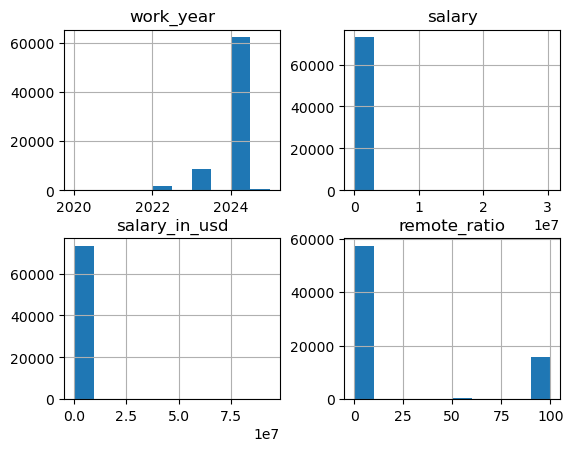

In [29]:
df.hist()

In [39]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73153.000000,7.314800e+04,7.315200e+04,73153.000000
mean,2023.830971,1.625534e+05,1.605606e+05,21.585581
std,0.478299,1.925761e+05,4.900456e+05,41.024045
min,2020.000000,1.400000e+04,1.500000e+04,0.000000
25%,2024.000000,1.069575e+05,1.068900e+05,0.000000
50%,2024.000000,1.480000e+05,1.475000e+05,0.000000
75%,2024.000000,2.000000e+05,1.997000e+05,0.000000
max,2025.000000,3.040000e+07,9.364266e+07,100.000000


array([[<Axes: title={'center': 'work_year'}>]], dtype=object)

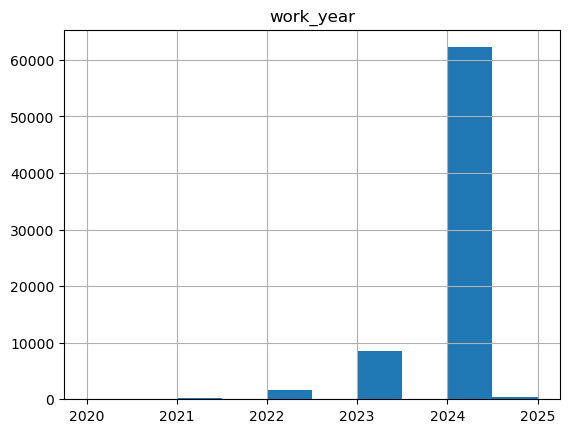

In [28]:
df_vacios_eliminados.hist(column='work_year')

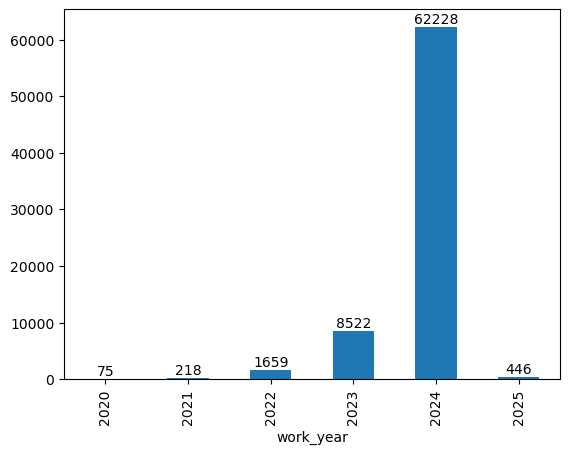

In [38]:
counts = df_vacios_eliminados['work_year'].value_counts().sort_index()

ax = counts.plot.bar()
for i, v in enumerate(counts):
    ax.text(i, v + max(counts)*0.01, str(v), ha='center')

plt.show()

In [81]:
## Arreglo de las categorias a grafica

analysis_categories = ['work_year','experience_level','employment_type','job_title','employee_residence','company_location','company_size']

## configuraciones de color 
def_color='darkblue'

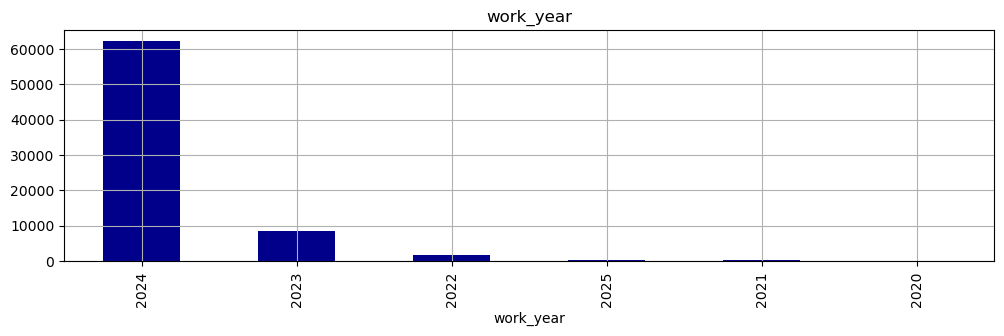

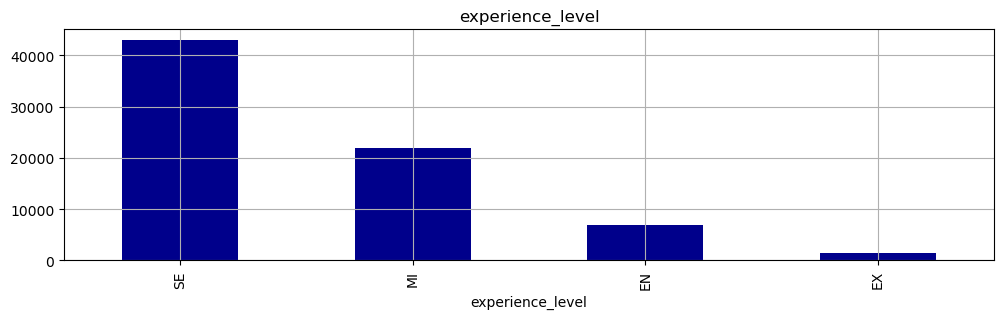

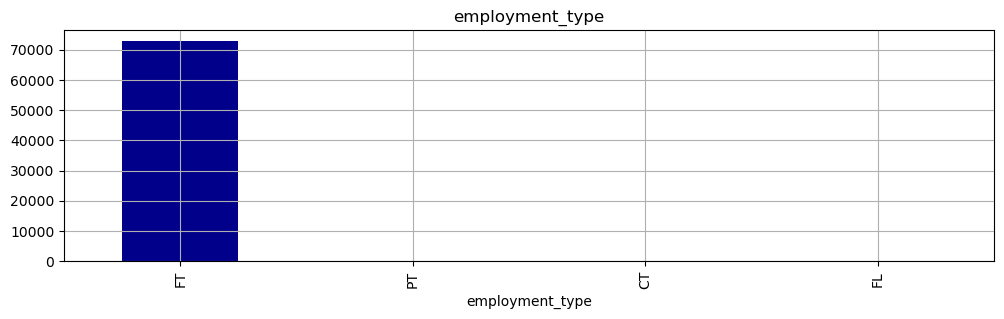

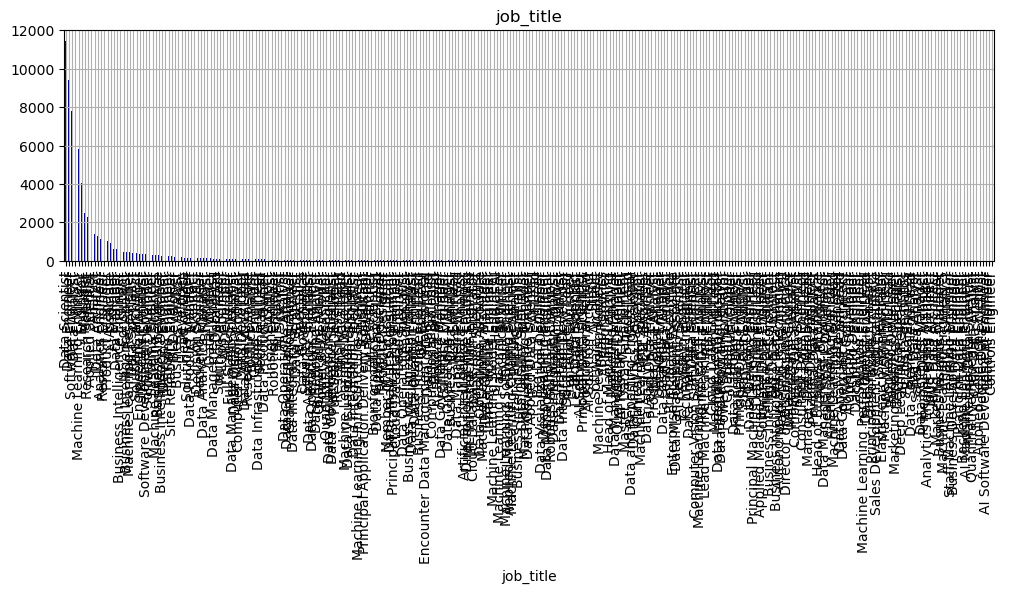

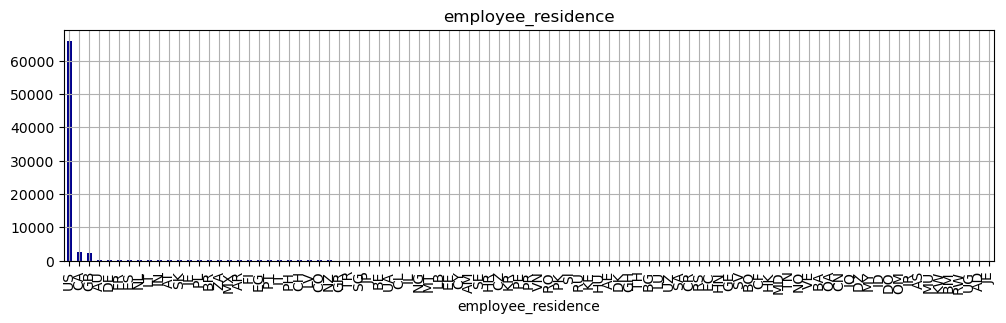

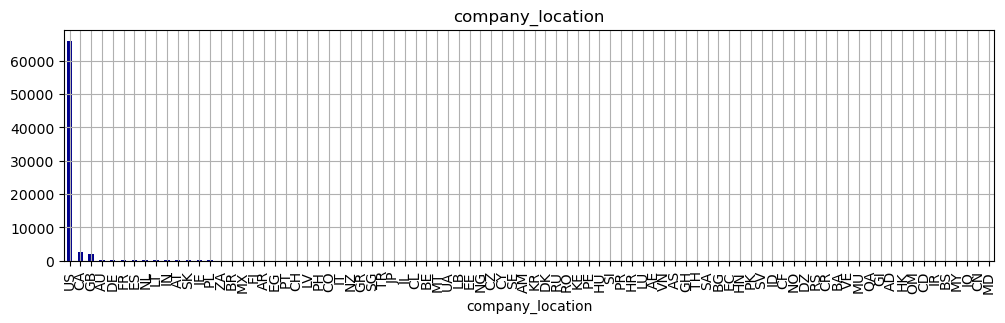

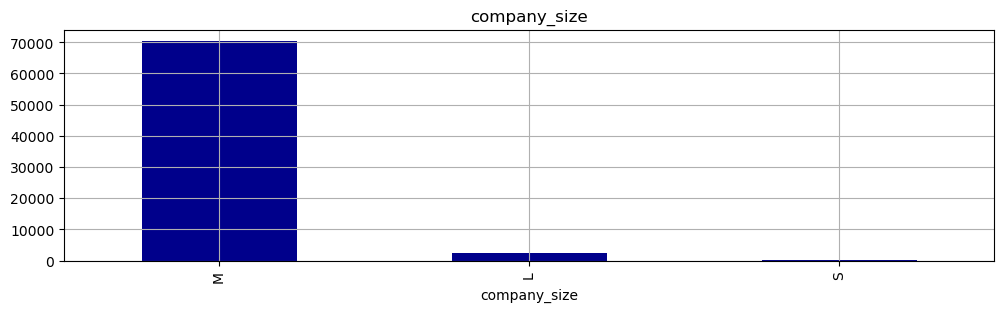

In [82]:
for f in analysis_categories:
    plt.figure(figsize=(12,3))
    df[f].value_counts().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.grid()
    plt.show()

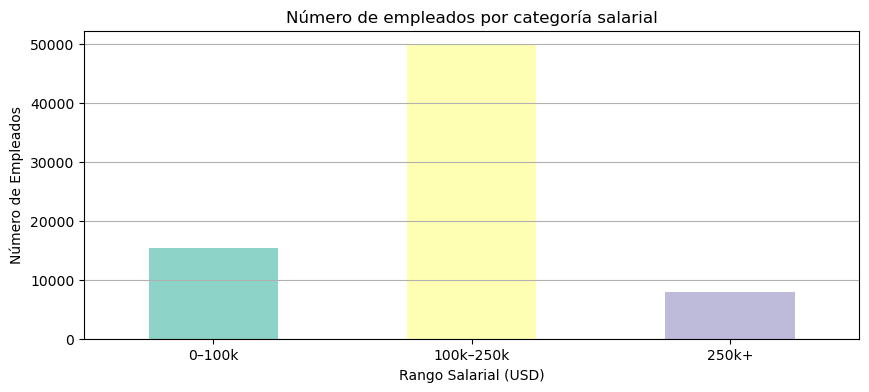

In [87]:
## configuracion de color agrupar los numeros de empleados que ganan de 0 a 100 de 100 a 250 mil a mas de 
## 250 mil dolares con el total de empleados que ganan esos salarios y ordenado por categoria. 


import pandas as pd
import matplotlib.pyplot as plt

# Configuración de la paleta de colores
palette = plt.cm.Set3(range(3))  # Selecciona los primeros 3 colores de la paleta Set3

# Crear la categoria del salariales
bins = [0, 100000, 250000, float('inf')]
labels = ['0–100k', '100k–250k', '250k+']
df['Salary Category'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels, right=False)

# Contar empleados por categoría salarial
salary_counts = df['Salary Category'].value_counts().sort_index()

# Crear gráfico
plt.figure(figsize=(10, 4))
salary_counts.plot(kind='bar', color=palette)
plt.title('Número de empleados por categoría salarial')
plt.xlabel('Rango Salarial (USD)')
plt.ylabel('Número de Empleados')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()
